In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set a slick style for our plots
sns.set_theme(style="darkgrid")

# Load the dataset (Make sure 'stud.csv' or whatever your file is named is in the same folder)
df = pd.read_csv('data/stud.csv') # UPDATE THIS FILENAME IF NEEDED

# Clean up column names (replaces spaces with underscores)
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_')

print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
print("--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicates ---")
print("Total Duplicates:", df.duplicated().sum())

print("\n--- Data Types ---")
print(df.info())

print("\n--- Statistical Summary ---")
display(df.describe())

--- Missing Values ---
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

--- Duplicates ---
Total Duplicates: 0

--- Data Types ---
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


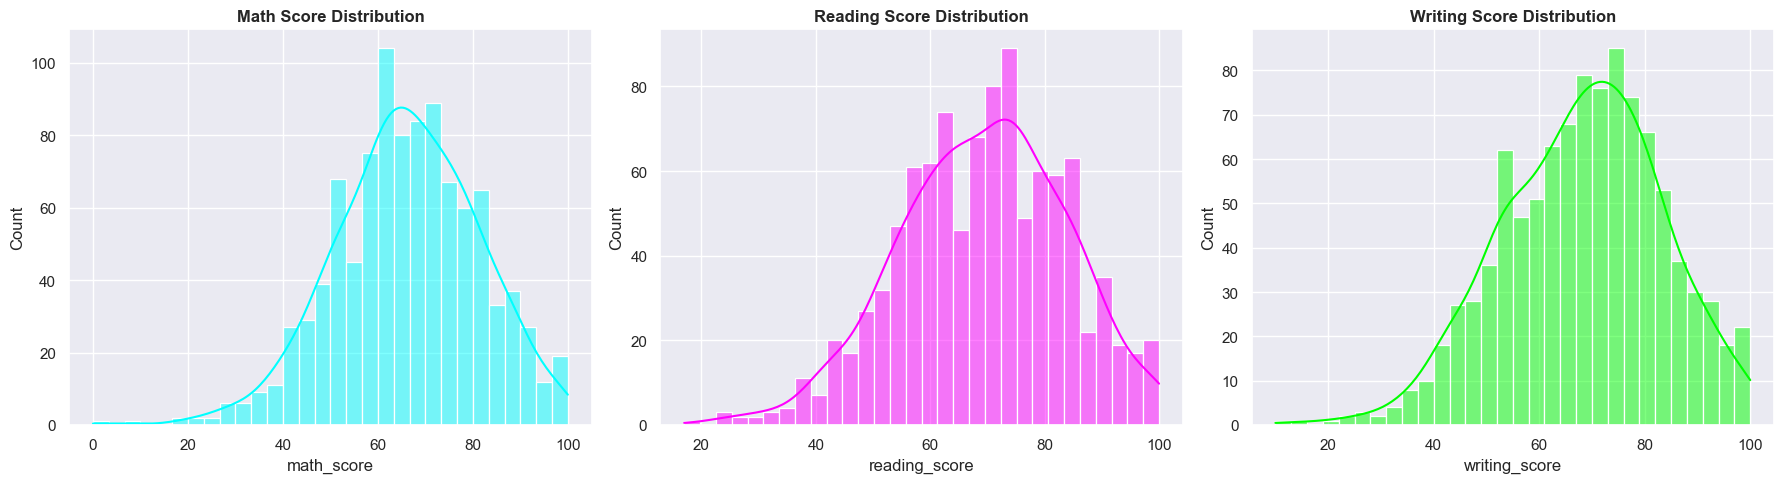

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotting distributions
sns.histplot(df['math_score'], bins=30, kde=True, ax=axs[0], color='cyan')
axs[0].set_title('Math Score Distribution', fontweight='bold')

sns.histplot(df['reading_score'], bins=30, kde=True, ax=axs[1], color='magenta')
axs[1].set_title('Reading Score Distribution', fontweight='bold')

sns.histplot(df['writing_score'], bins=30, kde=True, ax=axs[2], color='lime')
axs[2].set_title('Writing Score Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

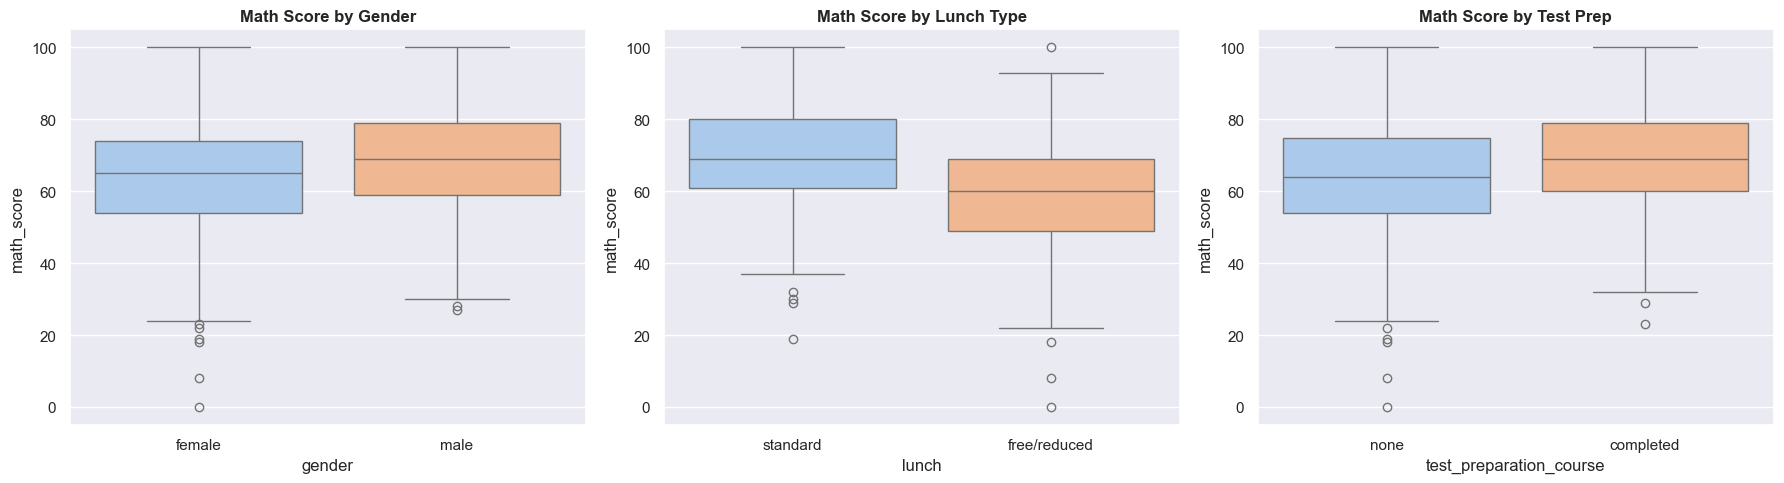

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Impact of Gender on Math
sns.boxplot(x='gender', y='math_score', data=df, ax=axs[0], palette='pastel')
axs[0].set_title('Math Score by Gender', fontweight='bold')

# Impact of Lunch on Math
sns.boxplot(x='lunch', y='math_score', data=df, ax=axs[1], palette='pastel')
axs[1].set_title('Math Score by Lunch Type', fontweight='bold')

# Impact of Test Prep on Math
sns.boxplot(x='test_preparation_course', y='math_score', data=df, ax=axs[2], palette='pastel')
axs[2].set_title('Math Score by Test Prep', fontweight='bold')

plt.tight_layout()
plt.show()

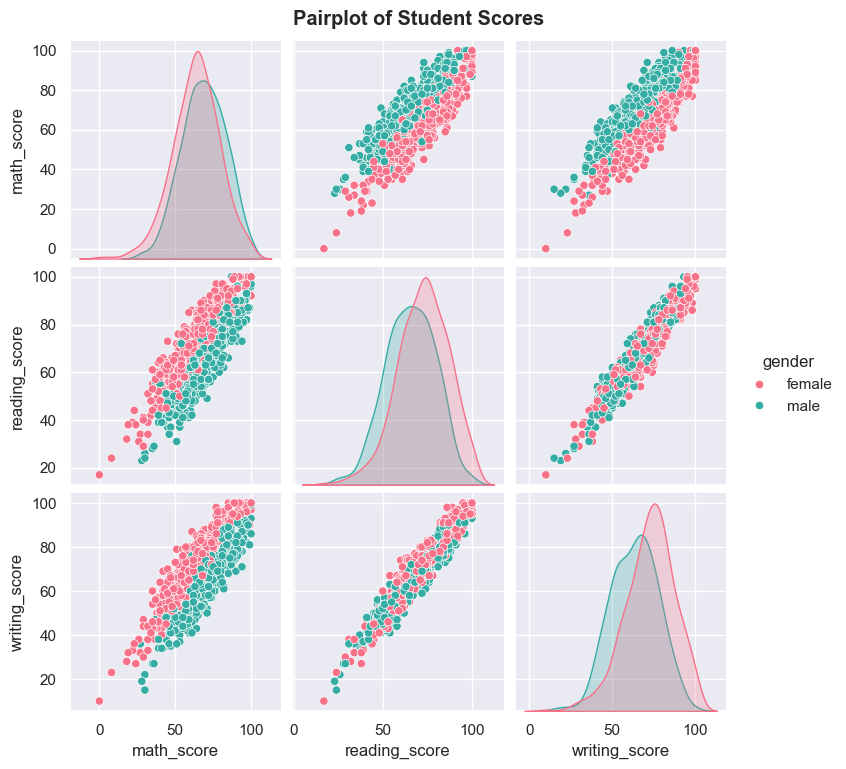

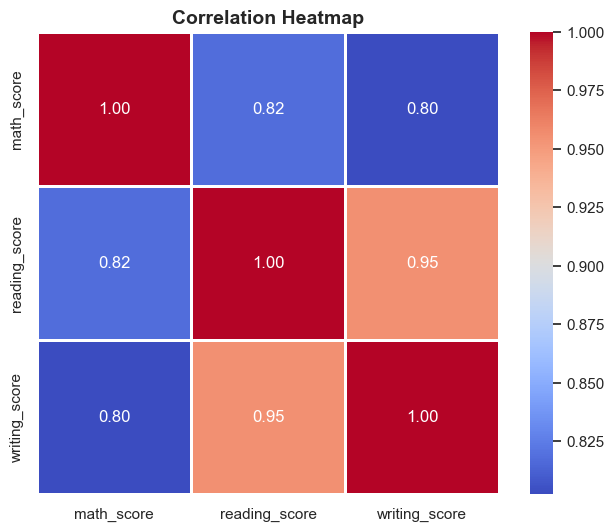

In [9]:
# Pairplot to see relationships between all scores at once
sns.pairplot(df, hue='gender', palette='husl')
plt.suptitle('Pairplot of Student Scores', y=1.02, fontweight='bold')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, square=True)
plt.title('Correlation Heatmap', fontweight='bold', fontsize=14)
plt.show()

In [10]:
# We want to predict math_score
X = df.drop(columns=['math_score'])
y = df['math_score']

# Automatically detect which columns are text (categorical) and which are numbers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

print("We are predicting: math_score\n")
print("Numerical Features to scale:", list(num_features))
print("Categorical Features to encode:", list(cat_features))

We are predicting: math_score

Numerical Features to scale: ['reading_score', 'writing_score']
Categorical Features to encode: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create the transformers
numeric_transformer = StandardScaler()
# drop='first' removes one of the encoded columns to prevent the "dummy variable trap"
cat_transformer = OneHotEncoder(drop='first', sparse_output=False) 

# Bundle them into a ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

print("✅ Preprocessor built successfully!")

✅ Preprocessor built successfully!


In [12]:
from sklearn.model_selection import train_test_split

# Split the data 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data AND transform it
X_train_processed = preprocessor.fit_transform(X_train)

# ONLY transform the test data (prevents data leakage)
X_test_processed = preprocessor.transform(X_test)

print(f"X_train original shape: {X_train.shape}")
print(f"X_train processed shape: {X_train_processed.shape}")
print("✅ Data is clean, encoded, scaled, and ready for Machine Learning!")

X_train original shape: (800, 7)
X_train processed shape: (800, 14)
✅ Data is clean, encoded, scaled, and ready for Machine Learning!


In [13]:
!pip install xgboost catboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 412.9 kB/s eta 0:00:0000:0100:03
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 511.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a helper function to evaluate our models
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

print("✅ Evaluation function ready!")

✅ Evaluation function ready!


In [15]:
# Import all the algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Create a dictionary of all the models we want to test
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42),
    "CatBoost Regressor": CatBoostRegressor(verbose=False, random_state=42)
}

# Lists to keep track of scores
model_names = []
r2_scores = []

print("Training models... This might take a few seconds \n")

for name, model in models.items():
    # 1. Train the model
    model.fit(X_train_processed, y_train)

    # 2. Make predictions on the Test set
    y_test_pred = model.predict(X_test_processed)

    # 3. Evaluate the predictions
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    # 4. Save the results
    model_names.append(name)
    r2_scores.append(test_r2)

# Create a Leaderboard DataFrame
leaderboard = pd.DataFrame({
    'Model Name': model_names,
    'R2 Score': r2_scores
}).sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

display(leaderboard)

Training models... This might take a few seconds 



,Model Name,R2 Score
0,Ridge,0.880450
1,Linear Regression,0.880433
2,CatBoost Regressor,0.851083
3,Random Forest,0.849035
4,Lasso,0.825446
5,XGBRegressor,0.825046
6,Decision Tree,0.711020


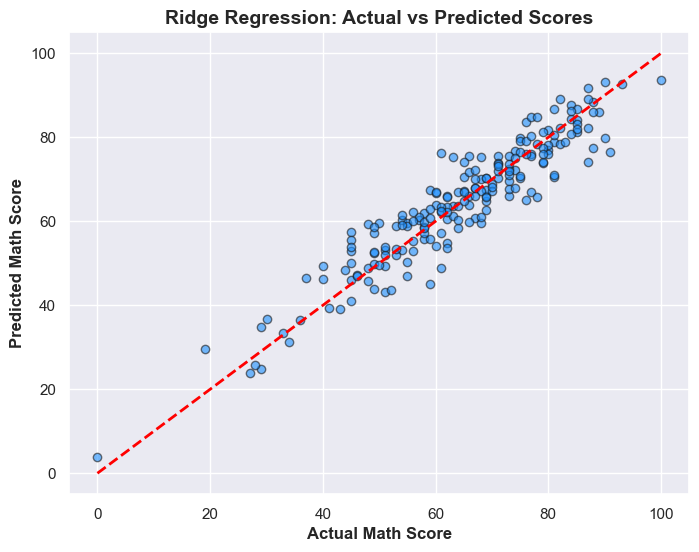

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train our champion model
champion_model = Ridge()
champion_model.fit(X_train_processed, y_train)

# 2. Make final predictions on the test set
y_pred = champion_model.predict(X_test_processed)

# 3. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6, edgecolor='k')

# Draw the "Perfect Prediction" line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')

plt.xlabel('Actual Math Score', fontweight='bold')
plt.ylabel('Predicted Math Score', fontweight='bold')
plt.title('Ridge Regression: Actual vs Predicted Scores', fontweight='bold', fontsize=14)
plt.show()

In [18]:
def predict_math_score(gender, race_ethnicity, parental_education, lunch, test_prep, reading, writing):
    # 1. Package the new student's data into a Pandas DataFrame
    new_student = pd.DataFrame({
        'gender': [gender],
        'race_ethnicity': [race_ethnicity],
        'parental_level_of_education': [parental_education],
        'lunch': [lunch],
        'test_preparation_course': [test_prep],
        'reading_score': [reading],
        'writing_score': [writing]
    })
    
    # 2. Push it through the preprocessor
    # CRITICAL: We only use .transform() here, NOT .fit_transform()!
    # We want to use the exact same scaling rules it learned from the training data.
    processed_student = preprocessor.transform(new_student)
    
    # 3. Make the prediction using our Champion Model
    prediction = champion_model.predict(processed_student)
    
    return round(prediction[0], 2)

# --- Let's test it out! ---
# Scenario: A male student from group C, whose parents went to some college.
# He gets free/reduced lunch, completed the test prep, reads at a 78, and writes at a 75.
predicted_score = predict_math_score(
    gender="male",
    race_ethnicity="group C",
    parental_education="some college",
    lunch="free/reduced",
    test_prep="completed",
    reading=78,
    writing=75
)

print(f"The predicted Math Score for this specific student is: {predicted_score}")

The predicted Math Score for this specific student is: 75.23
